# Section 1: Setup

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#Read CSV resources as Pandas dataframes
path_results = os.path.join('Resources','Study_results.csv')
path_metadata = os.path.join('Resources','Mouse_metadata.csv')

dfr = pd.read_csv(path_results)
dfm = pd.read_csv(path_metadata)

In [3]:
#Check the contents of Results DataFrame
dfr.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#Review the counts and data types of Results DataFrame
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [5]:
#Check the contents of Metadata DataFrame
dfm.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
#Review the counts and data types of Metadata DataFrame
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [7]:
#Review Unique observations for Mouse ID 
dfr['Mouse ID'].value_counts()

g989    13
k483    10
a251    10
s185    10
e584    10
        ..
u153     1
x336     1
h428     1
v199     1
f932     1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
#Some Mouse IDs have multiple entries, with duplicated Timepoint observations
dfr.loc[dfr['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [9]:
#We will drop the duplicates in the results DataFrame
dfr.drop_duplicates(['Mouse ID','Timepoint'],inplace=True)
#Check on our example Mouse ID g989
dfr.loc[dfr['Mouse ID']=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
329,g989,5,48.786801,0
620,g989,10,51.745156,0
815,g989,15,51.325852,1
950,g989,20,55.326122,1
1195,g989,25,56.045564,1
1380,g989,30,59.082294,1
1592,g989,35,62.570880,2


In [10]:
#Now we will add the Metadata based on Mouse ID to create our working DataFrame
df = dfr.merge(dfm,how='outer', on='Mouse ID')
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [11]:
#Check counts and datatypes of working DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1887
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Timepoint           1888 non-null   int64  
 2   Tumor Volume (mm3)  1888 non-null   float64
 3   Metastatic Sites    1888 non-null   int64  
 4   Drug Regimen        1888 non-null   object 
 5   Sex                 1888 non-null   object 
 6   Age_months          1888 non-null   int64  
 7   Weight (g)          1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


In [12]:
#Checking the number of unique Mices
Total_Mice = len(df['Mouse ID'].unique())
Total_Mice

249

# Section 2: Statistical Analysis

In [13]:
#Identify the unique regimens
df['Drug Regimen'].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [14]:
#Gathering all data by Drug Regimen and calculating core statistics
summary = df.groupby(by='Drug Regimen')
counts = summary['Tumor Volume (mm3)'].count()
means = summary['Tumor Volume (mm3)'].mean()
medians = summary['Tumor Volume (mm3)'].median()
stds = summary['Tumor Volume (mm3)'].std()
sems = summary['Tumor Volume (mm3)'].sem()

#Create new DatyaFrame with Statistical Analysis
statistics = pd.DataFrame({'Treatment Counts':counts, 'Mean': means.apply('{:.2f}'.format),
                           'Median':medians.apply('{:.2f}'.format),'Standard Deviation':stds.apply('{:.2f}'.format),
                           'SEMS':sems.apply('{:.2f}'.format)})

#Visualice Statistical Analysis Table
statistics

,Treatment Counts,Mean,Median,Standard Deviation,SEMS
Drug Regimen,,,,,
Capomulin,230,40.68,41.56,4.99,0.33
Ceftamin,178,52.59,51.78,6.27,0.47
Infubinol,178,52.88,51.82,6.57,0.49
Ketapril,188,55.24,53.70,8.28,0.60
Naftisol,186,54.33,52.51,8.13,0.60
Placebo,181,54.03,52.29,7.82,0.58
Propriva,156,52.39,50.91,6.57,0.53
Ramicane,228,40.22,40.67,4.85,0.32
Stelasyn,181,54.23,52.43,7.71,0.57


In [15]:
#Generating same summary table on a single line
statistics = df[['Tumor Volume (mm3)','Drug Regimen']].groupby(by='Drug Regimen').agg([('Treatment Counts','count'),
                                                                          ('Mean','mean'),
                                                                          ('Median','median'),
                                                                          ('Standard Deviation','std'),
                                                                          ('SEMS','sem')])

#Fixing formats and visualizing
statistics.columns = statistics.columns.droplevel()
statistics['Mean']=statistics['Mean'].map('{:.2f}'.format)
statistics['Median']=statistics['Median'].map('{:.2f}'.format)
statistics['Standard Deviation']=statistics['Standard Deviation'].map('{:.2f}'.format)
statistics['SEMS']=statistics['SEMS'].map('{:.2f}'.format)
statistics

,Treatment Counts,Mean,Median,Standard Deviation,SEMS
Drug Regimen,,,,,
Capomulin,230,40.68,41.56,4.99,0.33
Ceftamin,178,52.59,51.78,6.27,0.47
Infubinol,178,52.88,51.82,6.57,0.49
Ketapril,188,55.24,53.70,8.28,0.60
Naftisol,186,54.33,52.51,8.13,0.60
Placebo,181,54.03,52.29,7.82,0.58
Propriva,156,52.39,50.91,6.57,0.53
Ramicane,228,40.22,40.67,4.85,0.32
Stelasyn,181,54.23,52.43,7.71,0.57


# Section 3: Bar Plot and Pie Charts

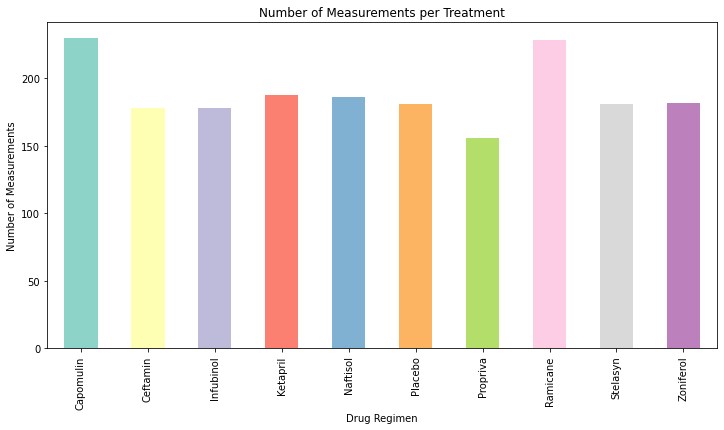

In [16]:
#Bar Plot using pandas
#Total Number of Measurements per treatment

#Plot bar chart using Pandas
ax = df.groupby('Drug Regimen').count()['Mouse ID'].plot(kind='bar', 
                                                         figsize=(12,6),
                                                         title='Number of Measurements per Treatment',
                                                         color= plt.get_cmap('Set3').colors)
#Fix y axis label
ax.set_ylabel('Number of Measurements')

#Show plot
plt.show()

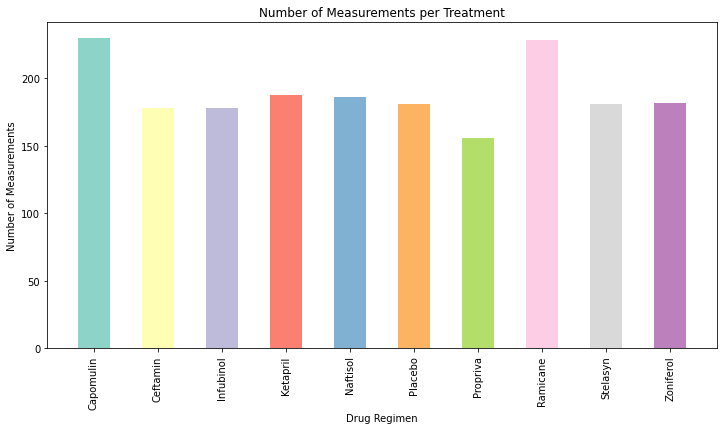

In [17]:
#Bar Plot using Matplotlib
#Total Number of Measurements per treatment

#Get the data form the Dataset
labels = df.groupby('Drug Regimen').count().index
counts = df.groupby('Drug Regimen').count()['Mouse ID'].values
x_axis = np.arange(len(counts))

#Plot bar chart with Matplotlib
plt.figure(figsize=(12,6))
plt.bar(x_axis,counts, width=0.5, color= plt.get_cmap('Set3').colors)
ticks= [v for v in x_axis]
plt.xticks(ticks,labels, rotation=90)
plt.title('Number of Measurements per Treatment')
plt.ylabel('Number of Measurements')
plt.xlabel('Drug Regimen')
plt.show()

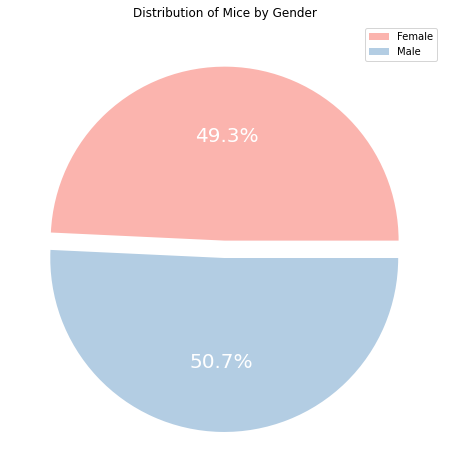

In [18]:
#Pie plot female mice vs male mice using Pandas

#Create pie chart with Pandas
ax = df.groupby('Sex').count().iloc[:,0].plot.pie(figsize=(8,8), 
                                                  title='Distribution of Mice by Gender',
                                                  labels = ['Female','Male'],
                                                  legend = True,
                                                  textprops={'color':"w", 'size':20},
                                                  autopct="%1.1f%%",
                                                  colors = plt.get_cmap('Pastel1').colors,
                                                  explode = (0,0.1))

#Remove y label to make ir cleaner
ax.set_ylabel('')

#Show the plot
plt.show()

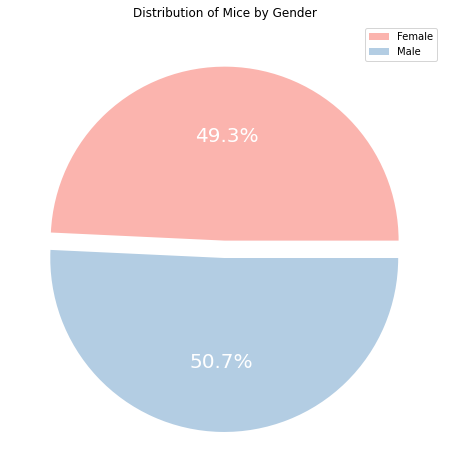

In [19]:
#Pie plot female mice vs male mice using Matplotlib

sizes = df.groupby('Sex').count().iloc[:,0].values

plt.figure(figsize=(8,8))
plt.pie(sizes, labels = ['Female','Male'],textprops={'color':"w", 'size':20},
        autopct="%1.1f%%",explode = (0,0.1),
        colors= plt.get_cmap('Pastel1').colors)
plt.title('Distribution of Mice by Gender')
plt.legend()
#ax.setp(sizes, size=8, weight="bold")
plt.show()

# Section 4: Identify Outliers for Top Treatments

In [20]:
#Select Mouses that got treatments Capomulin, Ramicane, Infubinol, and Ceftamin

#Get list of unique Mouse Ids
ID = df['Mouse ID'].unique()

#Store in array index of max Timepoint for each individual Mouse ID
locations = []

for x in range(1,len(df)):
    if df.iloc[x,0] != df.iloc[x-1,0]: #Find index of last observation of unique mice
        locations.append(x-1)
    elif x == (len(df)-1): #Add index of last mice
        locations.append(x)

#Create work dataframe based on our list of indexes and regimens of interest
regimens = df.iloc[locations,:].loc[(df['Drug Regimen']=='Capomulin') | 
                                    (df['Drug Regimen']=='Ramicane') |
                                    (df['Drug Regimen']=='Infubinol') |
                                    (df['Drug Regimen']=='Ceftamin')]

In [21]:
# Identify Outliers for Treatments of Interest

#Initialize list of treatments and list to store volumes
treatment = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
vols=[]
i=0

#Iterate through list of treatments to generate Outliers Report
for item in treatment:
    vols.append(regimens.loc[regimens['Drug Regimen']==item]['Tumor Volume (mm3)'])
    q = vols[i].quantile([.25,.5,.75])
    lowerq = q[.25]
    upperq = q[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    i+=1
    print(f'***{item}***')
    print('The IQR is: ' + str(iqr))
    print('Values lower than ' + str(lower_bound) + ' are outliers')
    print('Values higher than ' + str(upper_bound) + ' are outliers')
    print('Number of outliers: '+ str(len(regimens.loc[((regimens['Drug Regimen']==item) &
                                                        (regimens['Tumor Volume (mm3)']<lower_bound))|
                                                       ((regimens['Drug Regimen']==item) &
                                                        (regimens['Tumor Volume (mm3)']>upper_bound))])) + '\n')

***Capomulin***
The IQR is: 7.781863460000004
Values lower than 20.70456164999999 are outliers
Values higher than 51.83201549 are outliers
Number of outliers: 0

***Ramicane***
The IQR is: 9.098536719999998
Values lower than 17.912664470000003 are outliers
Values higher than 54.30681135 are outliers
Number of outliers: 0

***Infubinol***
The IQR is: 11.477135160000003
Values lower than 36.83290494999999 are outliers
Values higher than 82.74144559000001 are outliers
Number of outliers: 1

***Ceftamin***
The IQR is: 15.577752179999997
Values lower than 25.355449580000002 are outliers
Values higher than 87.66645829999999 are outliers
Number of outliers: 0



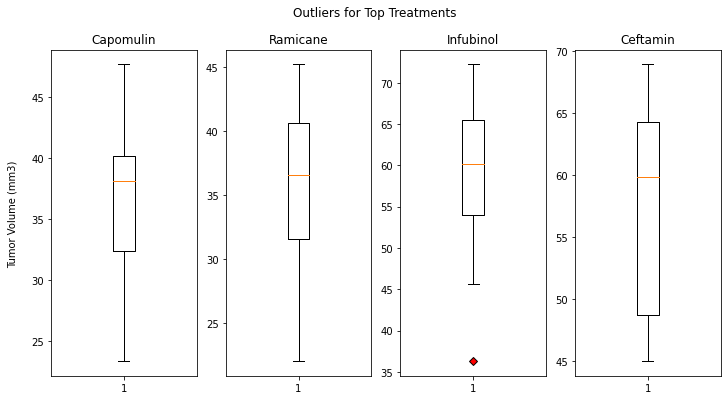

In [22]:
#Generate Box Plot for Treatments of Interest
outlier = dict(markerfacecolor='r', marker='D')
fig,ax = plt.subplots(1,4,figsize=(12,6))
fig.suptitle('Outliers for Top Treatments')
ax[0].boxplot(vols[0])
ax[0].title.set_text(treatment[0])
ax[1].boxplot(vols[1])
ax[1].title.set_text(treatment[1])
ax[2].boxplot(vols[2],flierprops = outlier)
ax[2].title.set_text(treatment[2])
ax[3].boxplot(vols[3])
ax[3].title.set_text(treatment[3])
fig.text(0.08, 0.5, 'Tumor Volume (mm3)', ha='center', va='center', rotation ='vertical')
plt.show()

# Section 5: Line and Scatter Plots

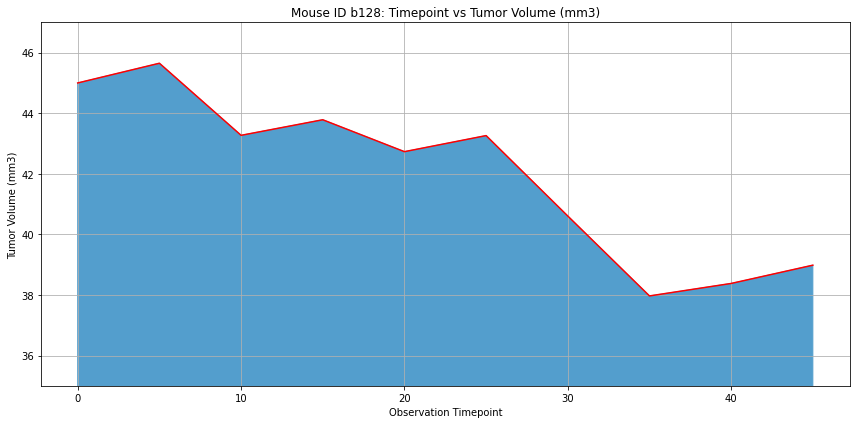

In [53]:
#We will select Mouse ID b128
#Linear plot of b128 of tumor volume vs time point

#Create working Dataframe for Mouse ID b128
mice = df.loc[df['Mouse ID'] == 'b128']

#Gather the values of interest
x_axis = mice['Timepoint']
y_axis = mice['Tumor Volume (mm3)']

#Create line plot
plt.figure(figsize=(12,6))
plt.plot(x_axis,y_axis, c='r')
plt.fill_between(x_axis,y_axis, color='#539ecd')
plt.ylim(35,47)
plt.title('Mouse ID b128: Timepoint vs Tumor Volume (mm3)')
plt.xlabel('Observation Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.tight_layout()
plt.show()

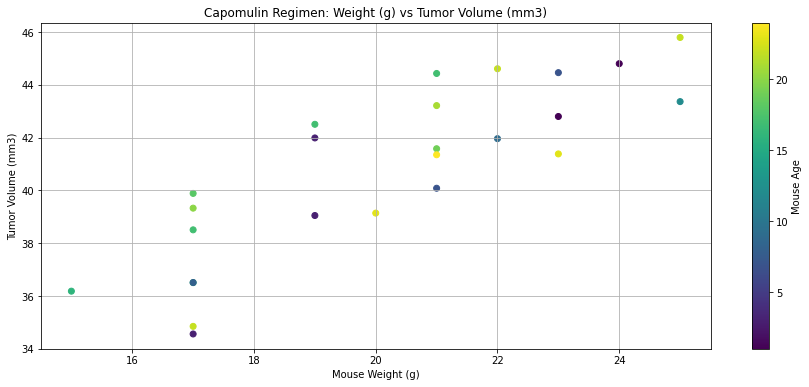

In [76]:
#Scatter plot of Mouse Weight vs Average tumor volume for Capomulin

#Create working dataset for Capomulin treatment agregated by average values
capdf = df.loc[df['Drug Regimen']== 'Capomulin'].groupby('Mouse ID').mean()

#Gather values of interest
x_axis = capdf['Weight (g)']
y_axis = capdf['Tumor Volume (mm3)']
sequence = np.arange(25)
#Create scatter plot
plt.figure(figsize=(15,6))
plt.scatter(x_axis,y_axis, c= capdf['Age_months'])
plt.title('Capomulin Regimen: Weight (g) vs Tumor Volume (mm3)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.colorbar(label = 'Mouse Age')
plt.grid()
plt.show()

In [64]:
capdf

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0
